In [1]:
import scanpy as sc
import matplotlib.pyplot as plt

## Load data

In [2]:
path = (
    "/epyc/projects/dschaub/data/domain-ident/zhuang_2023/processed/zhuang-abca-4.h5ad"
)
path = (
    "/epyc/projects/dschaub/data/domain-ident/zhuang_2023/processed/zhuang-abca-3.h5ad"
)
adata = sc.read_h5ad(path)
adata, adata.X.max()

(AnnData object with n_obs × n_vars = 1566842 × 1122
     obs: 'brain_section_label', 'feature_matrix_label', 'donor_label', 'donor_genotype', 'donor_sex', 'cluster_alias', 'x', 'y', 'z', 'subclass_confidence_score', 'cluster_confidence_score', 'high_quality_transfer', 'abc_sample_id', 'x_ccf', 'y_ccf', 'z_ccf', 'parcellation_index', 'parcellation_organ', 'parcellation_category', 'parcellation_division', 'parcellation_structure', 'parcellation_substructure', 'parcellation_organ_color', 'parcellation_category_color', 'parcellation_division_color', 'parcellation_structure_color', 'parcellation_substructure_color', 'domain', 'neurotransmitter', 'class', 'subclass', 'supertype', 'cluster'
     var: 'gene_identifier'
     obsm: 'spatial',
 495.0)

In [3]:
adata.obs.brain_section_label.unique()

['Zhuang-ABCA-3.023', 'Zhuang-ABCA-3.024', 'Zhuang-ABCA-3.017', 'Zhuang-ABCA-3.016', 'Zhuang-ABCA-3.010', ..., 'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.007', 'Zhuang-ABCA-3.013', 'Zhuang-ABCA-3.020', 'Zhuang-ABCA-3.009']
Length: 22
Categories (22, object): ['Zhuang-ABCA-3.001', 'Zhuang-ABCA-3.002', 'Zhuang-ABCA-3.003', 'Zhuang-ABCA-3.004', ..., 'Zhuang-ABCA-3.021', 'Zhuang-ABCA-3.022', 'Zhuang-ABCA-3.023', 'Zhuang-ABCA-3.024']

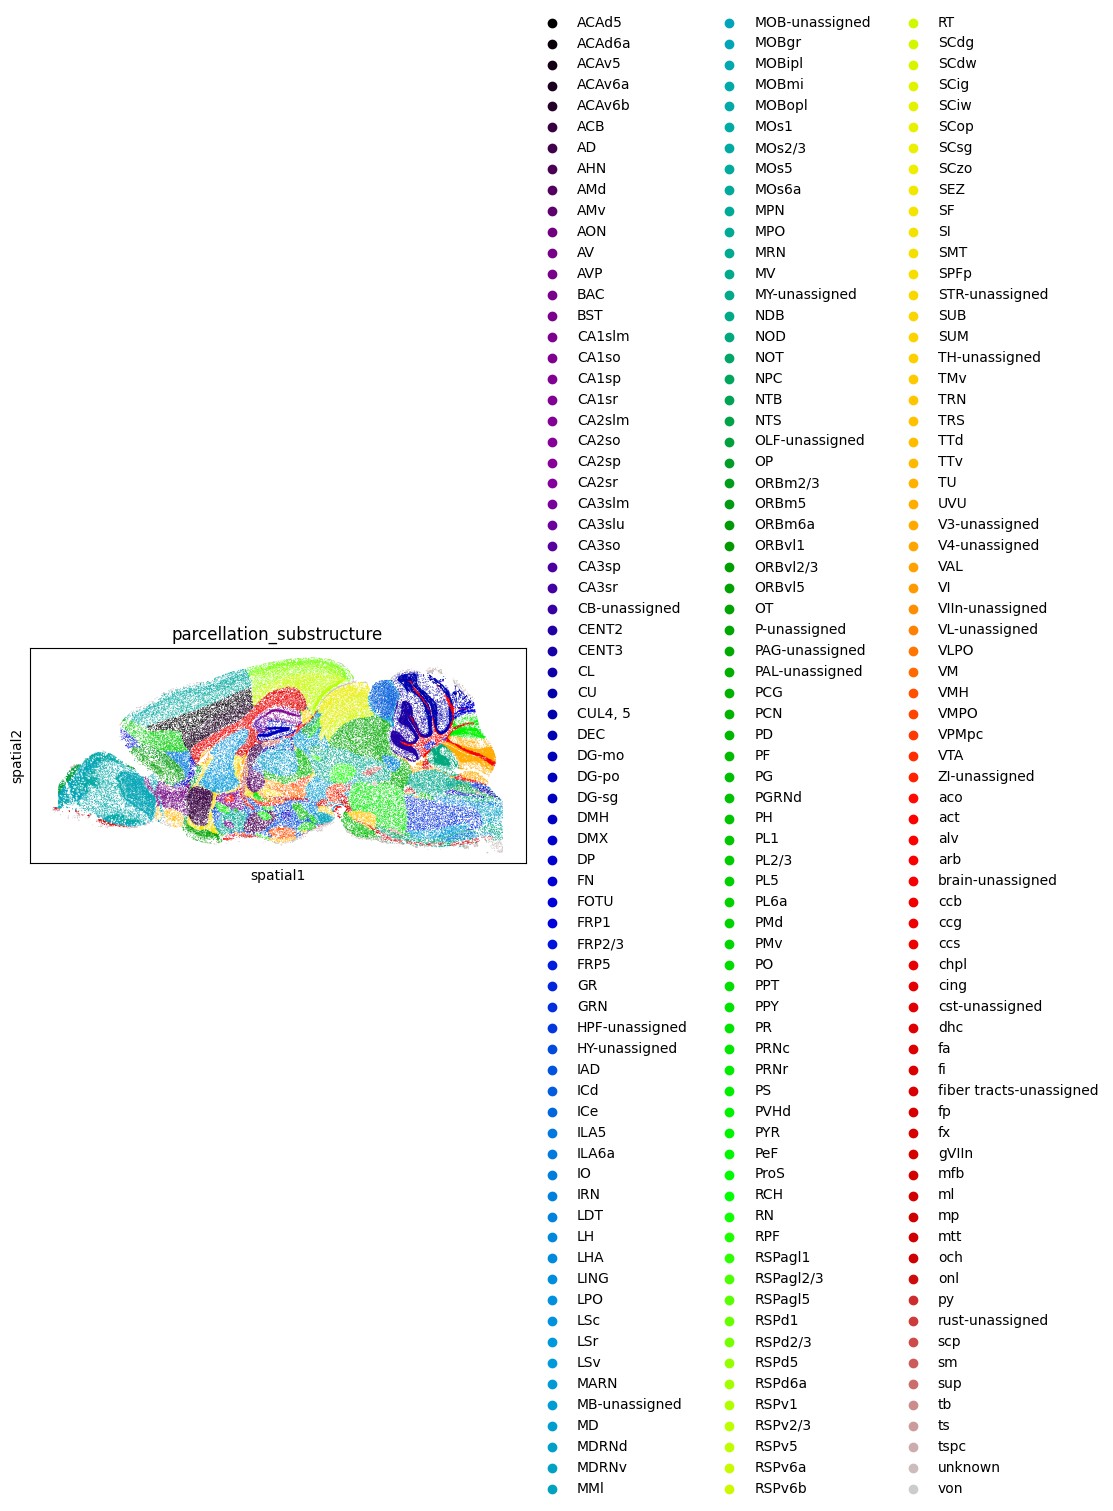

In [4]:
sample = "Zhuang-ABCA-4.003"
sample = "Zhuang-ABCA-3.003"

ad_sub = adata[adata.obs["brain_section_label"] == sample].copy()
sc.pl.spatial(
    ad_sub, color="parcellation_substructure", spot_size=0.025, palette="nipy_spectral"
)

In [5]:
coords = ad_sub.obsm["spatial"]
x, y = coords.T

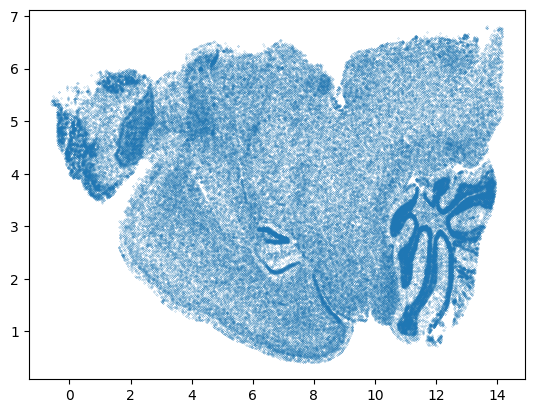

In [6]:
plt.scatter(x, y, s=0.02)

318


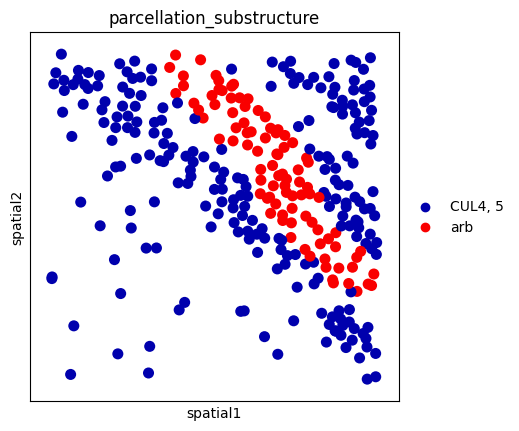

In [7]:
length = 0.3
x_min = 11.2
y_min = 1.5

x_max = x_min + length
y_max = y_min + length

# x_min, x_max = (11.5, 12)
# y_min, y_max = (1.5, 2)

mask_x = (x > x_min) & (x < x_max)
mask_y = (y > y_min) & (y < y_max)

mask = mask_x & mask_y
ad_sub_sub = ad_sub[mask].copy()
print(mask.sum())
sc.pl.spatial(ad_sub_sub, color="parcellation_substructure", spot_size=0.01)

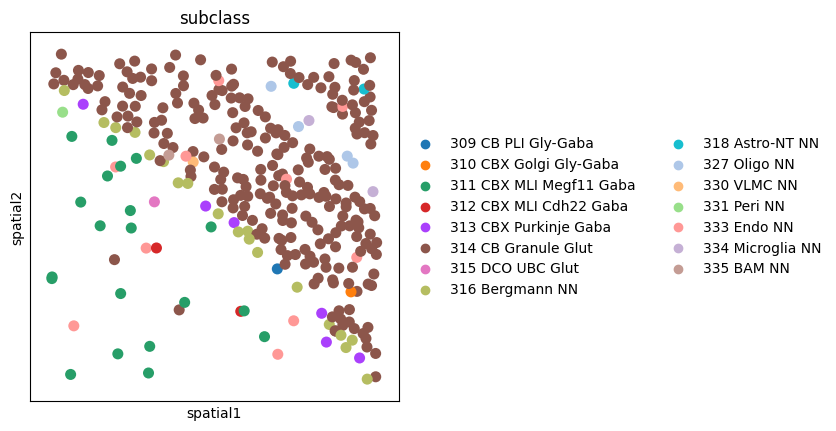

In [8]:
sc.pl.spatial(ad_sub_sub, color="subclass", spot_size=0.01)

In [9]:
ad_sub_sub.write_h5ad(f"data/{sample}_slice.h5ad")